In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

import sys
sys.path.append('../')
from my_utils.classification_eval_plots import ClassificationEvaluationPlots

In [19]:
data = load_breast_cancer(as_frame=True)

features = data.data
target = data.target

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression()

recalls = []
precisions = []
f1s = []

print(target.value_counts())

target
1    357
0    212
Name: count, dtype: int64


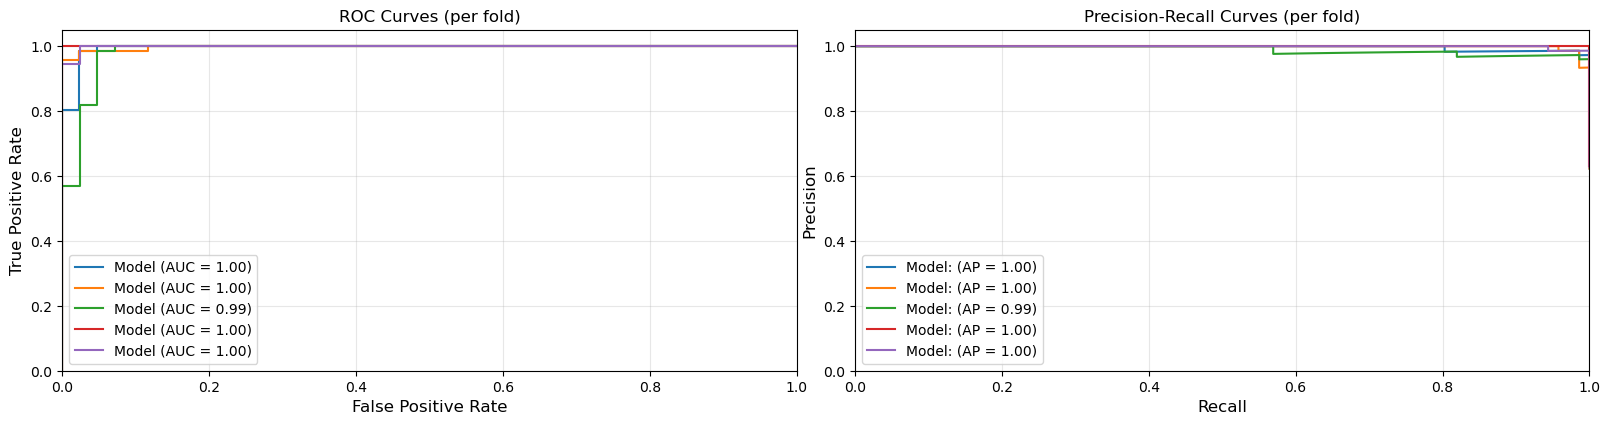

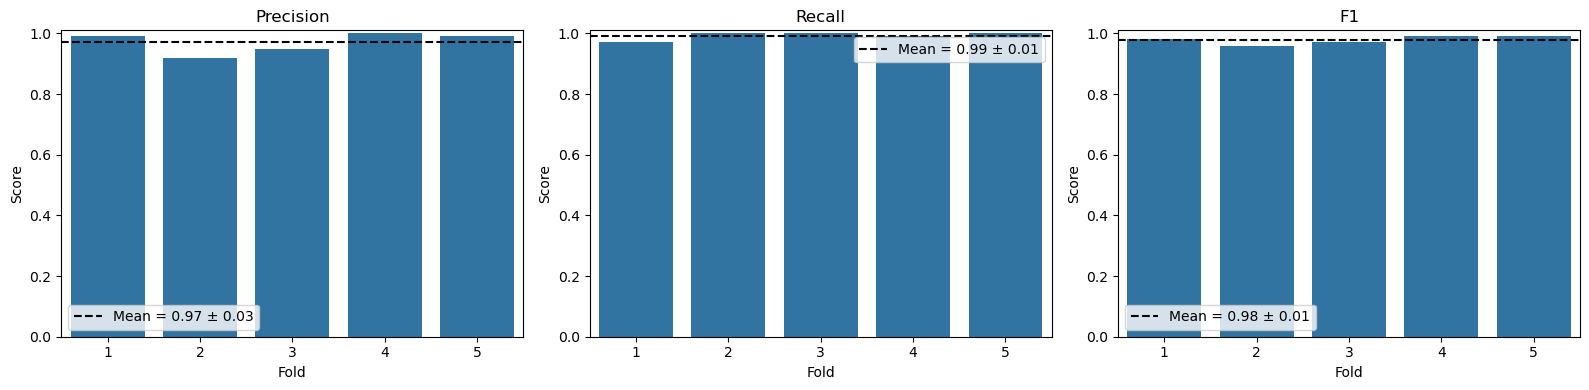

In [ ]:
figure, axes = plt.subplots(1, 2, figsize=(16, 4))
figure.tight_layout()


for index, (training_indices, testing_indices) in enumerate(skfold.split(features, target)):
    X_train = features.iloc[training_indices]
    y_train = target.iloc[training_indices]
    X_test  = features.iloc[testing_indices]
    y_test  = target.iloc[testing_indices]
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=500)),
    ])

    pipeline.fit(X_train, y_train)

    predictions = pipeline.predict(X_test)

    precision = precision_score(y_test, predictions)
    precisions.append(round(precision, 2))

    f1 = f1_score(y_test, predictions)
    f1s.append(round(f1, 2))

    recall = recall_score(y_test, predictions)
    recalls.append(round(recall, 2))

    probabilities = pipeline.predict_proba(X_test)

    ClassificationEvaluationPlots.plot_roc_curve(y_test, probabilities[:, 1], show_baseline=False, ax=axes[0])

    ClassificationEvaluationPlots.plot_precision_recall_curve(y_test, probabilities[:, 1], show_baseline=False, ax=axes[1])

axes[0].set_title("ROC Curves (per fold)")
axes[1].set_title("Precision-Recall Curves (per fold)")

# -----------------------------------------------------------------------------------------------------------------------------

figure, axes = plt.subplots(1, 3, figsize=(16, 4))

for ax, (name, metric) in zip(axes, zip(['Precision', 'Recall', 'F1'], [precisions, recalls, f1s])):
    sns.barplot(x=range(1, len(metric) + 1), y=metric, ax=ax)
    
    mean_value = np.mean(metric)
    std_value = np.std(metric)
    ax.axhline(y=mean_value, color='black', linestyle='--', label=f'Mean = {mean_value:.2f} ± {std_value:.2f}')
    
    ax.set_xlabel('Fold')
    ax.set_ylabel('Score')
    ax.set_title(name)
    ax.legend()

    ax.set_ylim(0, 1.01)

figure.tight_layout()